        Actual  Predicted
182589    4.00       4.31
152894    5.00       4.69
34960     3.50       4.11
100349    4.50       4.45
16566     4.50       4.29
25247     1.00       2.13
110457    3.00       2.39
91391     1.50       1.85
97179     1.00        NaN
128766    4.00       4.31


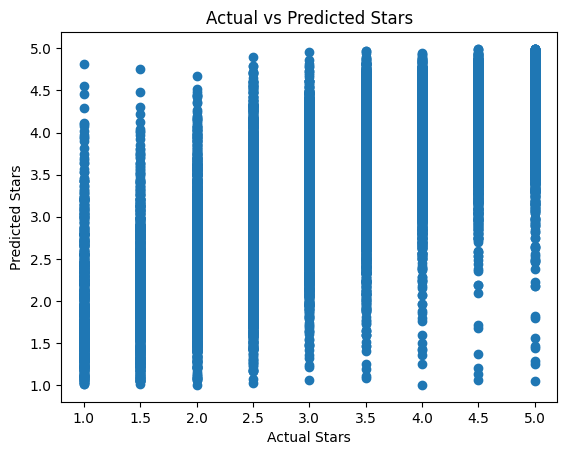

0.8167039522149044
Mean Absolute Error: 0.43820525085238204


In [47]:
# codeacademy project
from sklearn.impute import SimpleImputer
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.set_printoptions(precision=3, suppress=True)

# if it's JSON lines (one object per line), use lines=True
business = pd.read_json('/Users/harryclayson/Downloads/yelp_regression_project/yelp_business.json', lines=True)
review = pd.read_json('/Users/harryclayson/Downloads/yelp_regression_project/yelp_review.json', lines=True)
users = pd.read_json('/Users/harryclayson/Downloads/yelp_regression_project/yelp_user.json', lines=True)
checkins = pd.read_json('/Users/harryclayson/Downloads/yelp_regression_project/yelp_checkin.json', lines=True)
tips = pd.read_json('/Users/harryclayson/Downloads/yelp_regression_project/yelp_tip.json', lines=True)
photos = pd.read_json('/Users/harryclayson/Downloads/yelp_regression_project/yelp_photo.json', lines=True)

business_n_reviews = pd.merge(business, review, how='right', on='business_id')
bus_rev_tips = pd.merge(business_n_reviews, tips, how='left', on='business_id')
bus_rev_tips_users = pd.merge(bus_rev_tips, users, how='left', on='business_id')
bus_rev_tips_users_checkins = pd.merge(bus_rev_tips_users, checkins, how='left', on='business_id')
all_data = pd.merge(bus_rev_tips_users_checkins, photos, how='left', on='business_id')

clean_data = all_data.drop(columns=['number_pics', 'average_caption_length', 'hours', 'weekday_checkins', 'weekend_checkins', 'attributes', 'time', 'categories', 'average_tip_length', 'number_tips', 'business_id', 'name', 'average_review_length'])
# check later for accuracy which to drop

clean_data.dropna(subset=['longitude', 'latitude'], inplace=True)

numeric_data = clean_data.select_dtypes(include=[float, int])


ND_train, ND_test, stars_train, stars_test = train_test_split(numeric_data.drop(columns=['stars']), numeric_data['stars'], test_size=0.2, random_state=42)



regr = LinearRegression()
regr.fit(ND_train, stars_train)
stars_pred = regr.predict(ND_test)

df = pd.DataFrame({'Actual': stars_test, 'Predicted': stars_pred})

df["Predicted"] = df["Predicted"].where(
    (df["Predicted"] >= 1) & (df["Predicted"] <= 5),
    np.nan
)

print(df.head(10))


plt.plot(df['Actual'], df['Predicted'], 'o')
plt.xlabel('Actual Stars')
plt.ylabel('Predicted Stars')
plt.title('Actual vs Predicted Stars')
plt.show()

df = df.dropna()
print(df["Actual"].corr(df["Predicted"]))

mae = mean_absolute_error(df['Actual'], df['Predicted'])
print("Mean Absolute Error:", mae)